Import the Data as a pandas dataframe

In [63]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import signal 
df = pd.read_csv('/Users/spencerwilbur/DSP_HW/US_COVID_cases - US_COVID_cases.csv')
print(df)
pd.to_datetime(df.date)



           date     cases  deaths
0    2020-01-21         1       0
1    2020-01-22         1       0
2    2020-01-23         1       0
3    2020-01-24         2       0
4    2020-01-25         3       0
..          ...       ...     ...
779  2022-03-10  79356489  964062
780  2022-03-11  79400847  965746
781  2022-03-12  79411749  966218
782  2022-03-13  79418131  966361
783  2022-03-14  79467173  963926

[784 rows x 3 columns]


0     2020-01-21
1     2020-01-22
2     2020-01-23
3     2020-01-24
4     2020-01-25
         ...    
779   2022-03-10
780   2022-03-11
781   2022-03-12
782   2022-03-13
783   2022-03-14
Name: date, Length: 784, dtype: datetime64[ns]

In [24]:
x =len(df.deaths)

df["daily_deaths"] =" "

Problem 1: Plot the data for COVID Daily deaths and COVID Daily case counts. 

In [64]:
cum_deaths = df.deaths
df["daily_deaths"] =" " # create empty column to append daily_deaths to 
df["daily_cases"] =" " # create empty column to append daily_cases to 

for i in range(len(df.deaths)):
    df.daily_deaths[i] = 0
    df.daily_cases[i] = 1
    if i > 1:
        df.daily_deaths[i] = df.deaths[i]- df.deaths[i-1]
      
    if i > 1 and df.cases[i-1] != df.cases[i]:
            df.daily_cases[i] = df.cases[i]-df.cases[i-1]
        # df.append(daily_deaths)



/var/folders/fz/8zwnjrmn4bg1jtsbdd2d9_5w0000gn/T/ipykernel_49408/970330668.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.daily_deaths[i] = 0
/var/folders/fz/8zwnjrmn4bg1jtsbdd2d9_5w0000gn/T/ipykernel_49408/970330668.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.daily_cases[i] = 1
/var/folders/fz/8zwnjrmn4bg1jtsbdd2d9_5w0000gn/T/ipykernel_49408/970330668.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.daily_deat

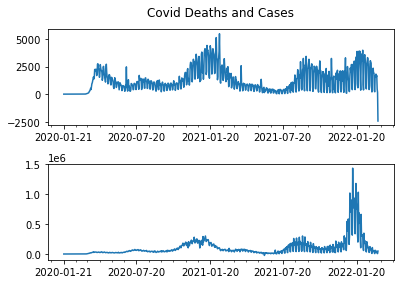

In [138]:
ts = df.date
# fig = plt.plot(ts, df.daily_deaths)
# fig =plt.plot(ts, df.daily_cases)

fig, ax = plt.subplots(2)
fig.suptitle('Covid Deaths and Cases')
ax[0].plot(ts, df.daily_deaths)
ax[0].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax[0].xaxis.set_minor_locator(mdates.MonthLocator())
ax[1].plot(ts, df.daily_cases)
ax[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax[1].xaxis.set_minor_locator(mdates.MonthLocator())
plt.subplots_adjust(left=0.1,
    bottom=0.1, 
    top=0.9, 
    wspace=0.4, 
    hspace=0.4)

Problem 2: 
Do a spectral analysis of the daily death data and plot it. Is
there a notable oscillation occurring at a specific frequency? What
is this frequency and speculate what it corresponds to.

Text(0, 0.5, 'Amplitude')

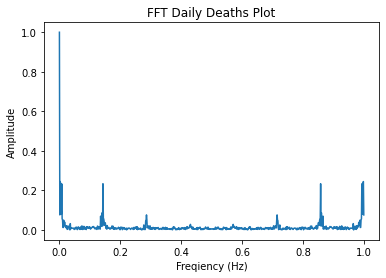

In [67]:


freq = np.fft.fft(df.daily_deaths) # create the frequency spectrum 


amp_spectrum = np.abs(freq)# amplitide spectrum 
freq_ax = np.linspace(0,1, len(df))
norm = (amp_spectrum - np.min(amp_spectrum))/(np.max(amp_spectrum)-np.min(amp_spectrum))
# zi = (xi – min(x)) / (max(x) – min(x)) normalize equation 
# fig = plt.figure()
plt.plot(freq_ax, norm)
plt.title('FFT Daily Deaths Plot')
plt.xlabel('Freqiency (Hz)')
# plt.xscale('log')
# plt.yscale('linear')
plt.ylabel('Amplitude')

Answer to Probelm 2:

There is a unique oscilaltion at the very begining around 0.1 frequency. This is most likely do to the lag of information regrading covid contagion and how to prepare yourself and prevent infection. 

Problem 3: 

Once you have vectors for both deaths (deaths) and cases
(cases), use xc = xcorr(deaths,cases,’coeff’) to compute a normalized
cross correlation function. Plot this correlation function and
figure out what the lag time is for the peak cross-correlation. Use
the convention that zero lag time is the peak value in the center of
the cross-correlation function. In other words, zero lag results for
the autocorrelation, i.e., xca = corr(deaths,deaths,’coeff’)

-17
21


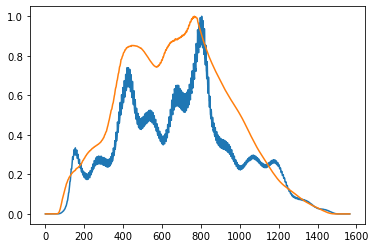

In [140]:
xc = np.correlate(df.daily_deaths, df.daily_cases, "full")
xs = signal.correlate(df.daily_deaths, df.deaths, mode = "full", method = 'auto')
norm = (xc - np.min(xc))/(np.max(xc)-np.min(xc))
norm_xs = (xs - np.min(xs))/(np.max(xs)-np.min(xs))
plt.plot(norm)
plt.plot(norm_xs)

lags = signal.correlation_lags(df.daily_deaths.size, df.daily_cases.size, mode="full")
lag = lags[np.argmax(xc)]

lags_death = signal.correlation_lags(df.daily_deaths.size, df.deaths.size, mode="full")
lag_death= lags_death[np.argmax(xs)]
print(lag_death) # this is lag bewteen daily deaths and cululative death
print(lag) #this is lag between cases reported daily and daily deaths 

Problem 4: 

Repeat part 3, but use filtered data for both deaths and cases.
I suggest you use [B,A] = butter(4,(1/14)/fn,'low') where fn = 1/2
(i.e., once per two days). Note that this provides a low pass filter
where the corner is 1/14 days (or once every two weeks). Why do you
suppose I chose this particular filter? What does this filter
remove? Does the lag delay for this calculation match the lag delay
for the part 3?


-16
19


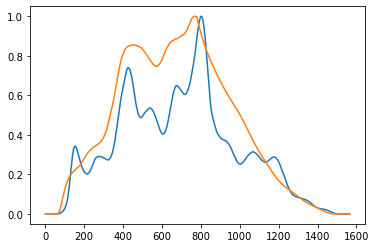

In [139]:
fn = 1/2

[B,A] = signal.butter(4,(1/14)/fn, 'low')
dd_filt = signal.filtfilt(B,A,df.daily_deaths)
cd_filt = signal.filtfilt(B,A, df.daily_cases)
death_filt = signal.filtfilt(B,A, df.deaths)

xc_filt = signal.correlate(dd_filt, cd_filt, mode= "full")

xs_filt = signal.correlate(dd_filt, death_filt, mode = "full", method = 'auto')
norm_filt = (xc_filt - np.min(xc_filt))/(np.max(xc_filt)-np.min(xc_filt))
norm_xs_filt = (xs_filt - np.min(xs_filt))/(np.max(xs_filt)-np.min(xs_filt))
plt.plot(norm_filt)
plt.plot(norm_xs_filt)

lags = signal.correlation_lags(dd_filt.size, cd_filt.size, mode="full")
lag = lags[np.argmax(xc_filt)]

# lags_death = signal.correlation_lags(dd_filt.size, death_filt.size, mode="full")
# lag_death= lags_death[np.argmax(xs_filt)]

lags_death = signal.correlation_lags(death_filt.size, dd_filt.size, mode="full")
lag_death= lags_death[np.argmax(xs_filt)]
print(lag_death) # this is lag bewteen daily deaths and cululative death
print(lag) #this is lag between cases reported daily and daily deaths 

Answer To Questions: 1/2 is used because it is half the nyquist frequency and we are low passing the signal to remove the various high frequency fluctuation that does not show the general trend between cases and deaths 
The filter removes the spurios high frequency oscillation that is probably due to covid in different geopgraphic regions and how heavily affected rural versus urban areas were impacted. the lag delay for the this plot is slightly less than the lag for the unfiltered data 

Problem 5: 
Finally, plot the original deaths and positives data and
filtered deaths and positives data on the same time axes (properly
annotated) to demonstrate the power of how filtering can really clean
up data with unwanted artifacts. Use legend to annotate properly.

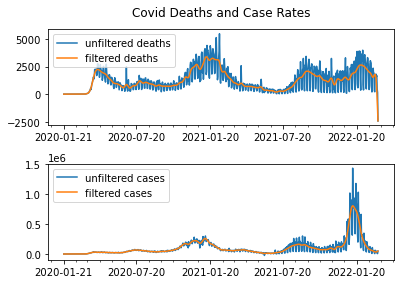

In [137]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.dates as mdates
fig, ax = plt.subplots(2)
fig.suptitle('Covid Deaths and Case Rates')
ax[0].plot(ts, df.daily_deaths, label = 'unfiltered deaths')
ax[0].plot(ts, dd_filt, label ='filtered deaths' )
ax[0].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax[0].xaxis.set_minor_locator(mdates.MonthLocator())
# Make space for and rotate the x-axis tick labels


ax[0].legend(loc = 'upper left')
ax[1].plot(ts, df.daily_cases, label = 'unfiltered cases')
ax[1].plot(ts, cd_filt, label = 'filtered cases')
ax[1].legend(loc = 'upper left')
ax[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax[1].xaxis.set_minor_locator(mdates.MonthLocator())
plt.subplots_adjust(left=0.1,
    bottom=0.1, 
    top=0.9, 
    wspace=0.4, 
    hspace=0.4)